CNN using keras [based on this article](https://medium.com/@BrendanArtley/mnist-keras-simple-cnn-99-6-731b624aee7f)



In [42]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, Adagrad, RMSprop

In [43]:
CATEGORIES = 10
EPOCHS = 20
BATCH_SIZE = 128
LEARNING_RATE = 0.001

In [44]:
# load training data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# scale inputs to be in range [0-1]
X_train /= 255
X_test /= 255

Y_train = to_categorical(y_train, CATEGORIES)
Y_test = to_categorical(y_test, CATEGORIES)

In [45]:
# define model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [46]:
# optimizer
# optimizer = Adam(learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999)
# optimizer = Adagrad(learning_rate=LEARNING_RATE)
optimizer = RMSprop(learning_rate=LEARNING_RATE)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(X_test, Y_test))


Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 0.1149 - accuracy: 0.9653 - val_loss: 0.7972 - val_accuracy: 0.7051
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0313 - val_accuracy: 0.9891
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0303 - val_accuracy: 0.9907
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0349 - val_accuracy: 0.9887
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0312 - val_accuracy: 0.9903
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0276 - val_accuracy: 0.9921
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0324 - val_accuracy: 0.9911

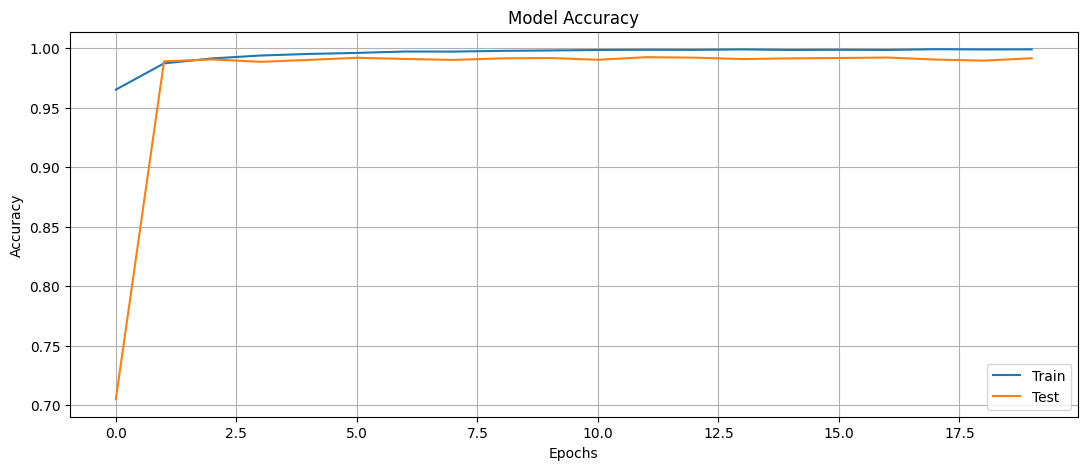

In [47]:
# plot model accuracy
plt.figure(figsize=(13, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.grid()
plt.show()